<a href="https://colab.research.google.com/github/Its-anushka/Machine-learning/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


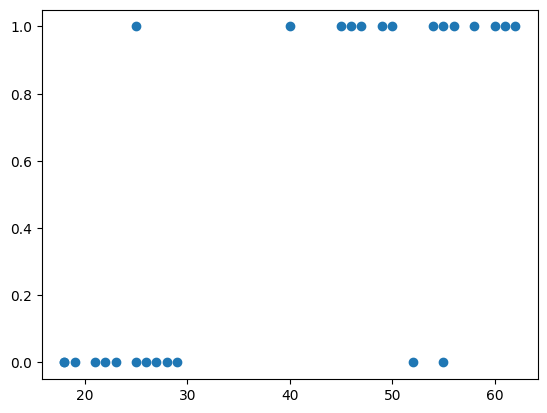

In [ ]:
plt.scatter(df.age, df.bought_insurance)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(df[['age']], df.bought_insurance, test_size = 0.1, random_state = 2)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
model.predict(X_test)

array([1, 0, 1])

In [ ]:
model.decision_function(X_test) #confidence

array([ 1.89913396, -2.1535046 ,  2.78564865])

In [ ]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
model.predict_proba(X_test)

array([[0.13020652, 0.86979348],
       [0.89599581, 0.10400419],
       [0.05810464, 0.94189536]])

##**HR Data**

In [ ]:
data = pd.read_csv("HR_comma_sep.csv")
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
retained = data[data['left'] == 0]
retained.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2002,0.45,0.69,5,193,3,0,0,0,sales,low
2003,0.78,0.82,5,247,3,0,0,0,sales,low
2004,0.49,0.60,3,214,2,0,0,0,sales,low


In [ ]:
retained.shape

(11428, 10)

In [ ]:
data.groupby('left').mean(numeric_only = True)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


Satisfaction level

average monthly hours

promotions

<Axes: xlabel='salary'>

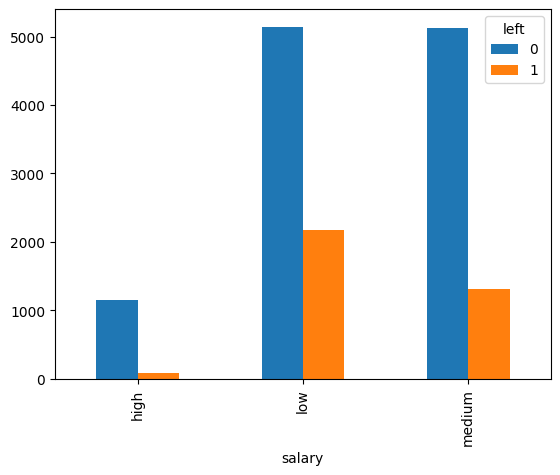

In [ ]:
data.groupby('salary')['left'].value_counts().unstack().plot(kind='bar')

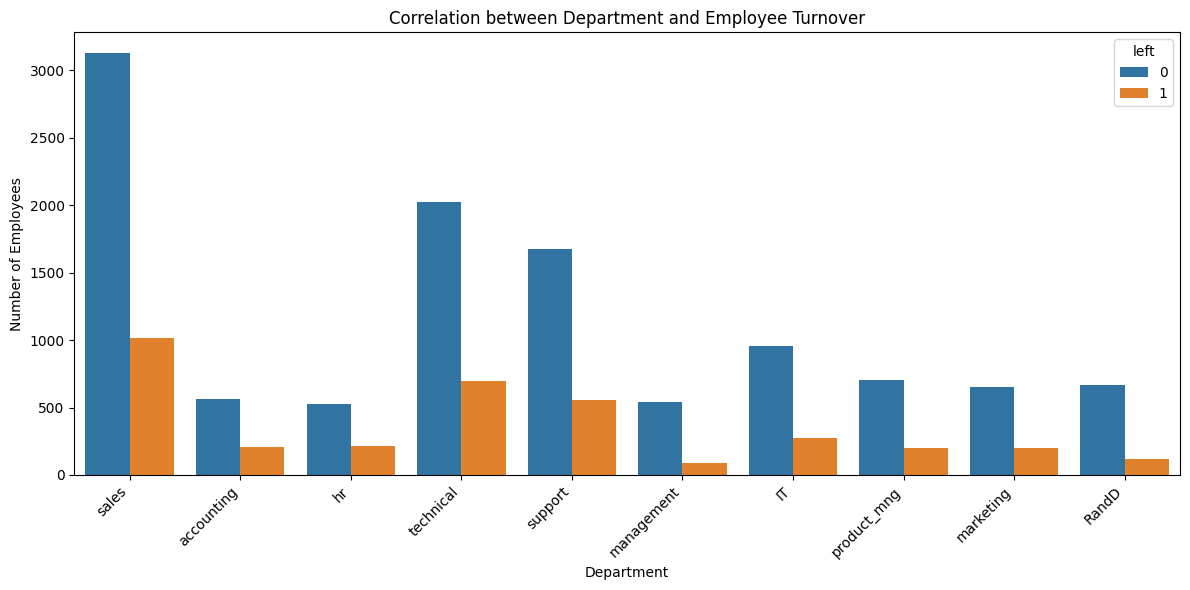

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Department', hue='left', data=data)
plt.title('Correlation between Department and Employee Turnover')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


In [ ]:
df = data[['salary', 'satisfaction_level', 'average_montly_hours', 'promotion_last_5years']]
df.head()

,salary,satisfaction_level,average_montly_hours,promotion_last_5years
0,low,0.38,157,0
1,medium,0.80,262,0
2,medium,0.11,272,0
3,low,0.72,223,0
4,low,0.37,159,0


In [ ]:
dummies = pd.get_dummies(df.salary, drop_first = True, dtype = int)
df = pd.concat([df, dummies], axis = 1)

In [ ]:
X = df.drop('salary', axis = 1)
X.head()
Y = data.left
Y.head()

,left
0,1
1,1
2,1
3,1
4,1


In [ ]:
model = LogisticRegression()

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, random_state = 25)

,satisfaction_level,average_montly_hours,promotion_last_5years,low,medium
13841,0.68,162,0,0,0
14359,0.84,263,0,1,0
12215,0.36,155,0,1,0
1383,0.43,145,0,1,0
7376,0.24,109,0,0,1
...,...,...,...,...,...
2934,0.77,225,0,1,0
10383,0.93,143,0,1,0
6618,0.88,268,0,0,0
8510,0.72,230,0,1,0


In [ ]:
model.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
model.score(X_test, Y_test)

0.7736666666666666

##**Iris Dataset**

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
X = iris.data
Y = iris.target

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, random_state = 25)

In [ ]:
from sklearn.linear_model import LogisticRegression
irism = LogisticRegression(max_iter = 200)

In [ ]:
irism.fit(X_train, Y_train)

LogisticRegression(max_iter=200)

In [ ]:
irism.predict(X_test)

array([0, 1, 2, 1, 2, 1, 2, 0, 1, 1, 0, 0, 0, 2, 0, 1, 2, 2, 1, 1, 1, 1,
       1, 0, 0, 2, 1, 2, 2, 0])

In [ ]:
irism.score(X_test, Y_test)

0.9666666666666667

Text(50.722222222222214, 0.5, 'Actual')

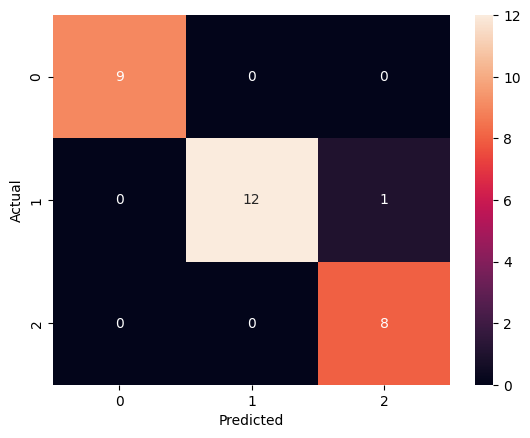

In [ ]:
from sklearn.metrics import confusion_matrix
y_predicted = irism.predict(X_test)
cm = confusion_matrix(Y_test, y_predicted)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
irism.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 200,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}